In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2]:
classif_data = pd.read_csv("../resources/datasets/classification.csv")
# classif_data

In [3]:
reg1_data = pd.read_csv("../resources/datasets/regression_1.csv")
# reg1_data.head(50)

In [4]:
reg2_data = pd.read_csv("../resources/datasets/regression_2.csv")
# reg1_data

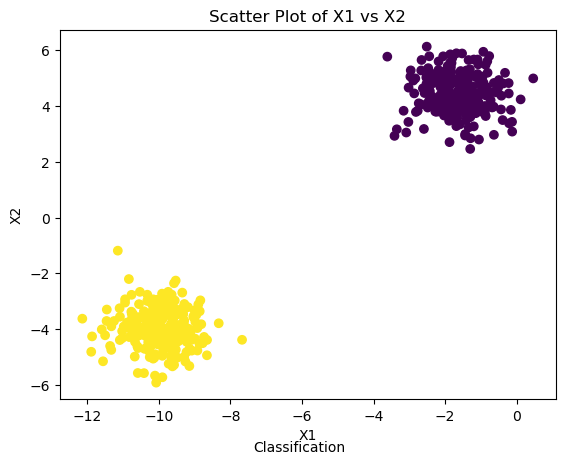

In [6]:
fig = plt.figure()
txt = 'Classification'
df = classif_data.copy()

# Assuming your data is stored in a DataFrame called 'df'
plt.scatter(df['x1'], df['x2'], c=df['label'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 vs X2')
fig.text(.5, .0005, txt, ha='center')
plt.savefig('../resources/img/scatterplot_classification.svg', format='svg')
plt.show()


In [7]:
def plotData(text, data, color):
    fig = plt.figure()
    txt = text
    df = data.copy()

    # Assuming your data is stored in a DataFrame called 'df'
    plt.scatter(df['x1'], df['x2'], c=color)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Scatter Plot of X1 vs X2')
    fig.text(.5, .0005, txt, ha='center')
    plt.savefig('../resources/img/scatterplot_regression.svg', format='svg')
    plt.show()


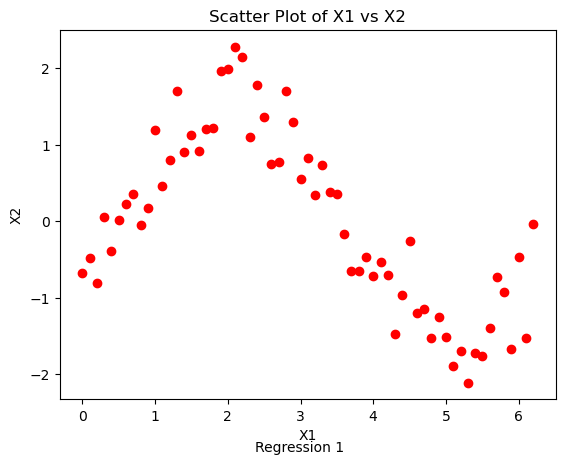

In [8]:
plotData('Regression 1', reg1_data, 'r')

In [44]:
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
              2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
              4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6, 
             6.1, 6.2])

y = np.array([-0.67490416, -0.479806127, -0.806082445, 0.053077393, -0.393342242, 0.017426615, 0.221409684,
              0.350119649, -0.04836164, 0.176704122, 1.194584447, 0.459938267, 0.801150859, 1.699029332,
              0.902421422, 1.120100146, 0.912280601, 1.20422787, 1.21683172, 1.959979477, 1.990679219,
              2.281412759, 2.144468502, 1.094185992, 1.776157696, 1.357095497, 0.749689337, 0.772948247,
              1.705199806, 1.298371124, 0.547764636, 0.829191733, 0.339677724, 0.734591887, 0.386444968,
              0.351277315, -0.173709549, -0.651898468, -0.659255501, -0.467404029, -0.717043446, -0.529638858,
              -0.706567033, -1.480820443, -0.96865058, -0.26354293, -1.195705101, -1.153706553, -1.523938085,
              -1.257080987, -1.519483088, -1.898505822, -1.703384728, -2.112807217, -1.728918284, -1.768277193,
              -1.40187734, -0.725571764, -0.930420597, -1.674052414, -0.47345773, -1.529905106, -0.043281796])
x.shape, y.shape

((63,), (63,))

In [57]:
def train_plot(x, y, txt):
    # Reshape x for sklearn
    x = x.reshape(-1, 1)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Predicted values
    y_pred = model.predict(x)

    # Plotting the data and the predicted line
    plt.scatter(x, y, label='Original data')
    plt.plot(x, y_pred, color='red', label='Predicted line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(txt)
    plt.legend()
    plt.show()


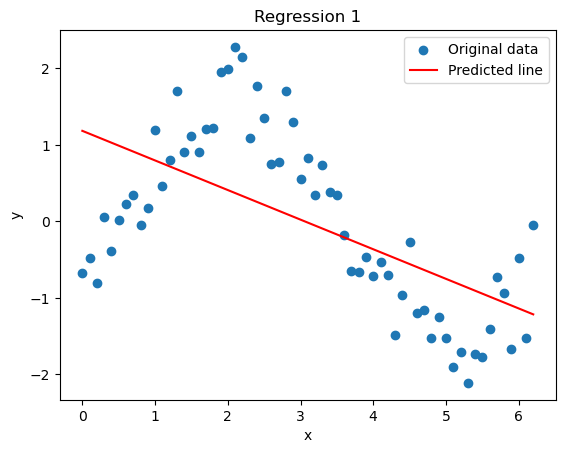

In [58]:
x1 = np.array(data['x1'])
x2 = np.array(data['x2'])
train_plot(x1, x2, 'Regression 1')

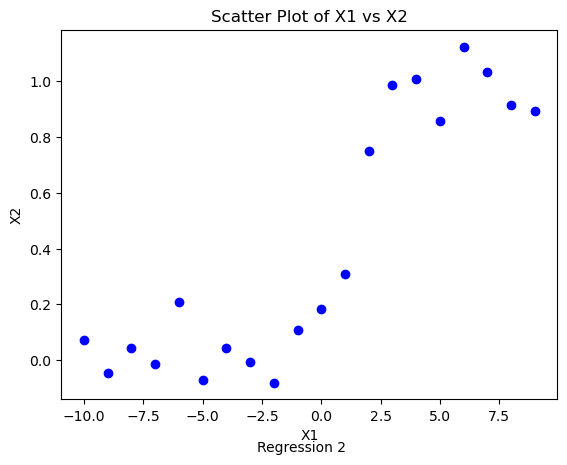

In [9]:
plotData('Regression 2', reg2_data, 'b')

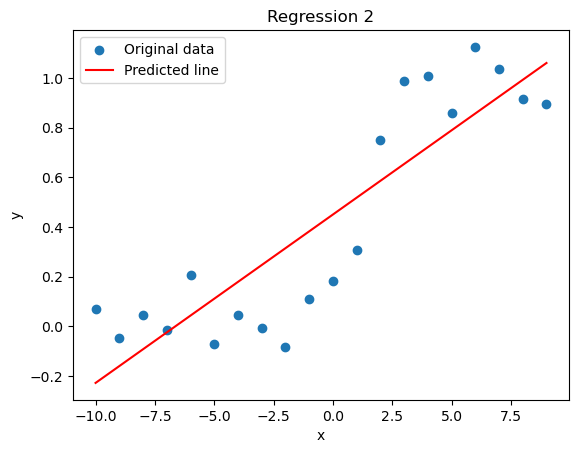

In [59]:
x1 = np.array(reg2_data['x1'])
x2 = np.array(reg2_data['x2'])
train_plot(x1, x2, 'Regression 2')

In [61]:
d = np.array(classif_data)
d

array([[-10.09794953,  -3.2302599 ,   1.        ],
       [ -2.25557887,   5.10710687,   0.        ],
       [-10.56203725,  -3.91900536,   1.        ],
       ...,
       [-10.01018479,  -4.37344571,   1.        ],
       [ -2.26248136,   4.87878794,   0.        ],
       [-10.97688148,  -3.89611107,   1.        ]])

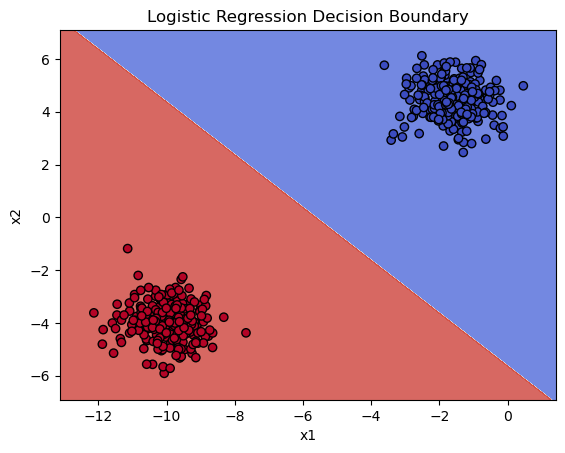

In [72]:
# Given dataset
data = np.array(classif_data)

# Separating features (x1, x2) and labels (y)
X = data[:, :-1]  # Features (x1, x2)
y = data[:, -1]   # Labels

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Creating a meshgrid for decision boundary visualization
h = .05  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicting on the meshgrid to obtain the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the prediction to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plotting the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('../resources/img/decision_boundary_regression.svg', format='svg')
plt.title('Logistic Regression Decision Boundary')
plt.show()


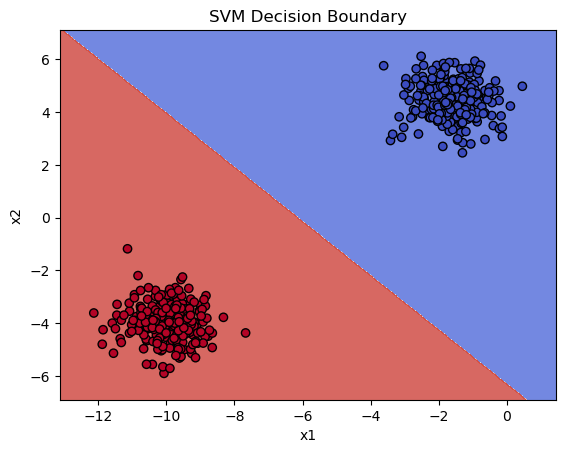

In [68]:
# Separating features (x1, x2) and labels (y)
X = data[:, :-1]  # Features (x1, x2)
y = data[:, -1]   # Labels

# Fit SVM model
model = SVC(kernel='linear')  # Using a linear kernel for simplicity
model.fit(X, y)

# Creating a meshgrid for decision boundary visualization
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicting on the meshgrid to obtain the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the prediction to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plotting the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Boundary')
plt.show()

Accuracy: 0.90


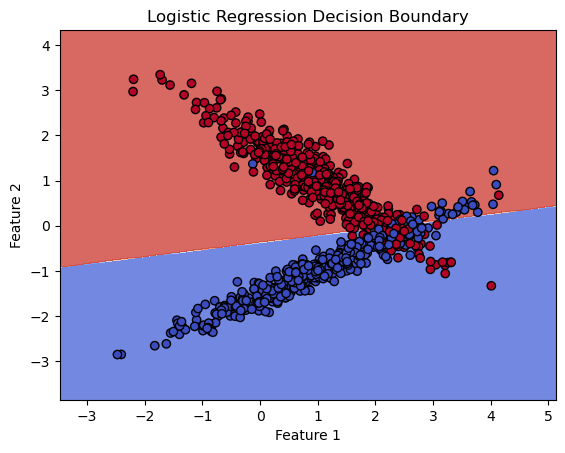

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Generating synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create a meshgrid for decision boundary visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point in meshgrid to create decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()
